In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/file.zip/setup.zip/archive.zip/archive.zip
%ls

Archive:  /content/drive/MyDrive/file.zip/setup.zip/archive.zip/archive.zip
replace A2M.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A2M.csv  APT.csv  BXB.csv  CTX.csv  FPH.csv  LLC.csv  QAN.csv       SEK.csv  TAH.csv  WPL.csv
AGL.csv  AST.csv  CAR.csv  CWN.csv  GMG.csv  MFG.csv  QBE.csv       SGP.csv  TCL.csv  WTC.csv
ALL.csv  ASX.csv  CBA.csv  CWY.csv  GOZ.csv  MGR.csv  QUB.csv       SGR.csv  TLS.csv  XRO.csv
ALQ.csv  AWC.csv  CCL.csv  DMP.csv  GPT.csv  MPL.csv  REA.csv       SHL.csv  TPM.csv
ALU.csv  AZJ.csv  CGF.csv  DOW.csv  HVN.csv  MQG.csv  RHC.csv       SKI.csv  TWE.csv
ALX.csv  BEN.csv  CHC.csv  drive/   IAG.csv  NAB.csv  RIO.csv       SOL.csv  VCX.csv
AMC.csv  BHP.csv  CIM.csv  DXS.csv  IEL.csv  NCM.csv  RMD.csv       SPK.csv  VEA.csv
AMP.csv  BLD.csv  COH.csv  EVN.csv  ILU.csv  NST.csv  S32.csv       STO.csv  WBC.csv
ANN.csv  BOQ.csv  COL.csv  FBU.csv  IPL.csv  ORG.csv  sample_data/  SUN.csv  WES.csv
ANZ.csv  BPT.csv  CPU.csv  FLT.csv  JBH.csv  ORI.csv  SAR.csv       SVW.csv  

In [ ]:
import pandas as pd

# List of stock symbols
stocks = ['COL', 'CSL', 'FMG', 'FPH', 'JBH', 'RMD', 'SAR', 'TPM']

# List to store dataframes
stock_dfs = []

# Read each CSV file and store the dataframes in a list
for stock in stocks:
    filename = stock + '.csv'
    price_data = pd.read_csv(filename)
    # Add a 'Symbol' column with the stock symbol
    price_data['Symbol'] = stock
    stock_dfs.append(price_data)

# Concatenate all dataframes into a single dataframe
combined_data = pd.concat(stock_dfs, ignore_index=True)
price_data_frame=combined_data[['Date','Symbol','Close']]
price_data_closing=price_data_frame.pivot(index='Date', columns='Symbol', values='Close')
price_data_closing.head()


Symbol,COL,CSL,FMG,FPH,JBH,RMD,SAR,TPM
Date,,,,,,,,
2000-01-04,NaN,7.18667,0.01178,NaN,NaN,0.83125,1.02219,NaN
2000-01-05,NaN,7.15500,0.01178,NaN,NaN,0.81250,1.02219,NaN
2000-01-06,NaN,7.00000,0.01276,NaN,NaN,0.80000,1.02219,NaN
2000-01-07,NaN,6.85000,0.01276,NaN,NaN,0.78875,0.98568,NaN
2000-01-10,NaN,7.33333,0.01276,NaN,NaN,0.79000,0.98568,NaN


In [ ]:
import numpy as np

log_returns = np.log(price_data_closing).diff()
weights = np.array(np.random.random(len(stocks)))
rebalanced_weights = random_weights / np.sum(random_weights)

# Calculate expected annualized return
expected_return = np.sum((log_returns.mean() * rebalanced_weights) * 252)

# Calculate expected volatility
expected_volatility = np.sqrt(np.dot(rebalanced_weights.T, np.dot(log_returns.cov() * 252, rebalanced_weights)))

# Assume risk-free rate of 1% annually
risk_free_rate = 0.01

# Calculate Sharpe Ratio
sharpe_ratio = (expected_return - risk_free_rate) / expected_volatility

weights_df=pd.DataFrame(data={'random_weights':random_weights,'rebalanced_weights':rebalanced_weights})
print("="*80)
print("PORTFOLIO WEIGHTS")
print(weights_df)
metrics_df=pd.DataFrame(data={'expected_return':expected_return,'expected_volatility':expected_volatility,'sharpe_ratio':sharpe_ratio},index=[0])
print("="*80)
print(metrics_df)

PORTFOLIO WEIGHTS
   random_weights  rebalanced_weights
0        0.105709            0.022283
1        0.537415            0.113287
2        0.914666            0.192811
3        0.671847            0.141625
4        0.915954            0.193083
5        0.248183            0.052317
6        0.464055            0.097823
7        0.886016            0.186772
   expected_return  expected_volatility  sharpe_ratio
0         0.194806             0.246892      0.748528


In [ ]:
# Define the number of simulations being used for Monte-Carlo Simulation

no_of_simulations=1000

# Prepare the weight array

all_weights=np.zeros((no_of_simulations,len(stocks)))

# Prepare the returns array

ret_arr=np.zeros(no_of_simulations)

# Prepare the volatility array

vol_arr=np.zeros(no_of_simulations)

# Prepare the sharpe array

sharpe_arr=np.zeros(no_of_simulations)

# Simulation of prices

for index in range(no_of_simulations):

  # Calculating the weights of the array
  weights=np.array(np.random.random(len(stocks)))

  # Rebalancing the weights
  rebalanced_weights=weights/np.sum(weights)

  # Calculating the expected returns and volatility
  expected_return=np.sum((log_returns.mean()*rebalanced_weights)*252)

  expected_volatility = np.sqrt(np.dot(rebalanced_weights.T, np.dot(log_returns.cov() * 252, rebalanced_weights)))


  # Calculating the sharpe ratio
  sharpe_ratio=(expected_return-risk_free_rate)/expected_volatility

  risk_free_rate=0.01

  # Storing the results in the array
  all_weights[index,:]=rebalanced_weights

  ret_arr[index]=expected_return

  vol_arr[index]=expected_volatility

  sharpe_arr[index]=sharpe_ratio

simulations_data=[{'all_weights':all_weights,'ret_arr':ret_arr,'vol_arr':vol_arr,'sharpe_arr':sharpe_arr}]

simulations_df=pd.DataFrame(data=simulations_data).T

simulations_df=simulations_df.infer_objects()
print(simulations_df.head())


                                                             0
all_weights  [[0.11946558781564849, 0.10808137069448323, 0....
ret_arr      [0.18086290300244373, 0.17407495846004686, 0.1...
vol_arr      [0.2289150904101555, 0.23875200532212312, 0.20...
sharpe_arr   [0.7464029684382206, 0.6872191847715694, 0.786...


In [ ]:
max_sharpe_idx = np.argmax(sharpe_arr)
min_volatility_idx = np.argmin(vol_arr)

max_sharpe_weights = all_weights[max_sharpe_idx, :]
max_sharpe_return = ret_arr[max_sharpe_idx]
max_sharpe_volatility = vol_arr[max_sharpe_idx]
max_sharpe_ratio = sharpe_arr[max_sharpe_idx]

min_volatility_weights = all_weights[min_volatility_idx, :]
min_volatility_return = ret_arr[min_volatility_idx]
min_volatility_volatility = vol_arr[min_volatility_idx]
min_volatility_ratio = sharpe_arr[min_volatility_idx]

# Print or use the results
print("Maximum Sharpe Ratio Portfolio:")
print("Weights:", max_sharpe_weights)
print("Expected Return:", max_sharpe_return)
print("Volatility:", max_sharpe_volatility)
print("Sharpe Ratio:", max_sharpe_ratio)
print()
print("Minimum Volatility Portfolio:")
print("Weights:", min_volatility_weights)
print("Expected Return:", min_volatility_return)
print("Volatility:", min_volatility_volatility)
print("Sharpe Ratio:", min_volatility_ratio)

Maximum Sharpe Ratio Portfolio:
Weights: [0.10146656 0.22824524 0.06771489 0.22410058 0.11771158 0.13722411
 0.02989172 0.09364532]
Expected Return: 0.17599708284596383
Volatility: 0.1834550831276035
Sharpe Ratio: 0.9048377402031611

Minimum Volatility Portfolio:
Weights: [0.07870066 0.20654932 0.0070774  0.19082154 0.14582544 0.18109533
 0.08038253 0.10954778]
Expected Return: 0.161347277549318
Volatility: 0.1813256612969063
Sharpe Ratio: 0.8346710358965623


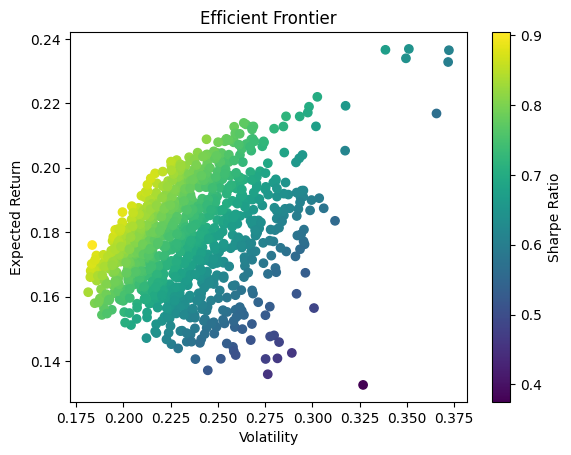

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
# Calculating negative sharpe ratio for optimization using SciPy as it has minimization function present in it.
from logging import log
def get_metrics(weights:list)-> np.array:
  weights=np.array(weights)
  returns=np.sum(log_returns.mean()*weights*252)
  volatility=np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights)))
  sharpe_ratio=(returns-.01)/volatility
  return np.array([returns,volatility,sharpe_ratio])

def grab_neg_sharpe(weights:list)->np.array:

  return get_metrics(weights)[2]-1

def grab_neg_volatility(weights:list)->np.array:

  return get_metrics(weights)[1]

def check_sum(weights:list)->float:

  return np.sum(weights)-1




In [ ]:
import scipy.optimize as sci_plt

bounds=tuple((0,1) for symbol in range(len(stocks)))
constraints=[{'type':'eq','fun':check_sum}]
init_guess=1/len(stocks)*np.ones(len(stocks))

neg_sharpe_result=sci_plt.minimize(grab_neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=constraints)

print(neg_sharpe_result)
neg_volatility_result=sci_plt.minimize(grab_neg_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=constraints)

print(neg_volatility_result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.9307691758667568
       x: [ 0.000e+00  5.207e-19  0.000e+00  7.168e-17  1.040e-16
            0.000e+00  1.000e+00  0.000e+00]
     nit: 3
     jac: [ 2.115e-01  2.454e-01  4.604e-01  1.876e-01  2.141e-01
            2.340e-01  1.350e-02  2.746e-01]
    nfev: 27
    njev: 3
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.17337381328663173
       x: [ 1.040e-17  2.278e-01  1.515e-02  3.004e-01  1.629e-01
            1.743e-01  4.323e-02  7.621e-02]
     nit: 8
     jac: [ 1.898e-01  1.732e-01  1.735e-01  1.734e-01  1.737e-01
            1.733e-01  1.738e-01  1.731e-01]
    nfev: 72
    njev: 8


In [ ]:
optimized_weights=neg_sharpe_result.x
rebalanced_weights=optimized_weights/np.sum(optimized_weights)
print("="*80)
print("OPTIMIZED METRICS")
optimized_metrics=get_metrics(optimized_weights)
print(optimized_metrics)

OPTIMIZED METRICS
[0.06129253 0.74089155 0.06923082]
